In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("titanic3.csv")

In [2]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [3]:
data=data.dropna(subset=['age','fare'])

In [6]:
data.dtypes


pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

<Axes: xlabel='survived', ylabel='fare'>

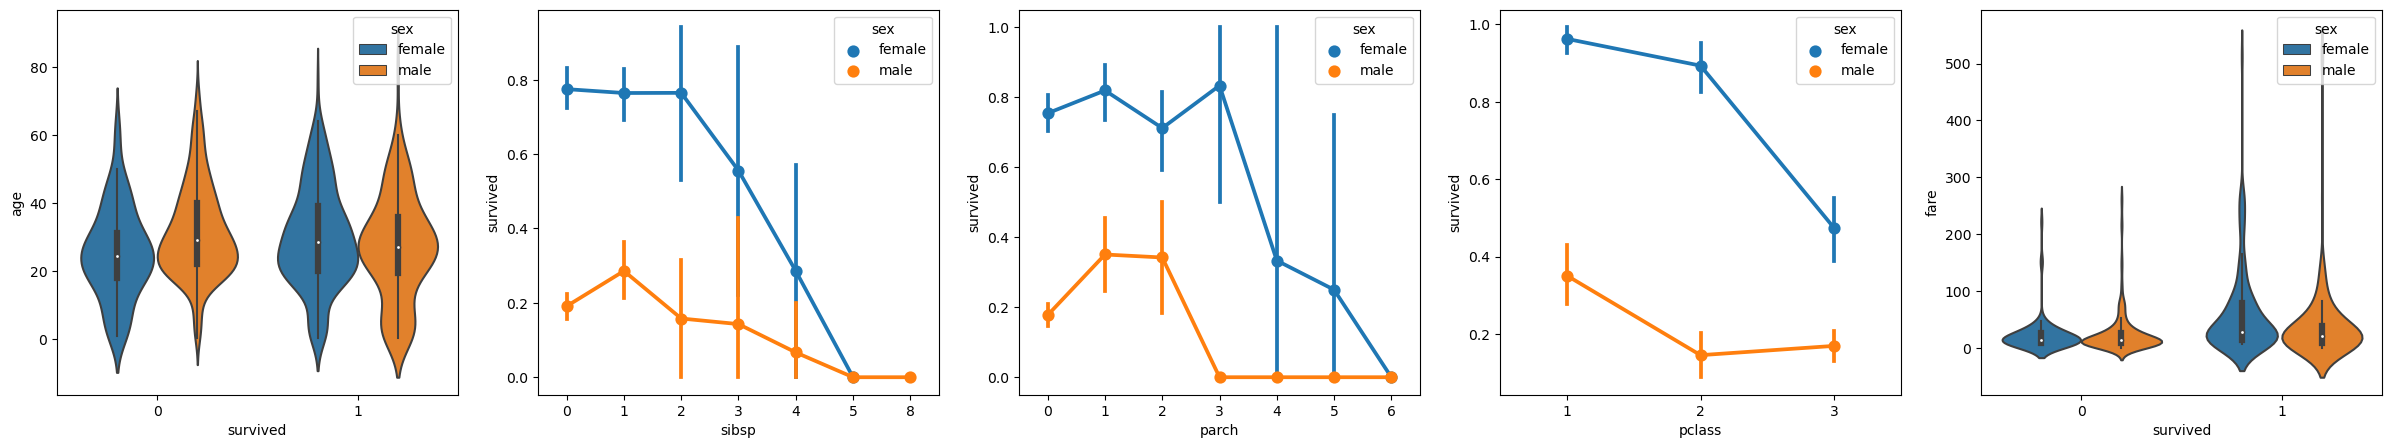

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [8]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [13]:
data.corr().abs()[["survived"]]

C:\Users\Sampath Sam\AppData\Local\Temp\ipykernel_1768\143381672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.319979
survived,1.000000
sex,0.537719
age,0.053957
sibsp,0.012657
parch,0.114091
fare,0.249164
body,NaN
relatives,0.206754


In [10]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

C:\Users\Sampath Sam\AppData\Local\Temp\ipykernel_1768\3242586923.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().abs()[["survived"]]


,survived
pclass,0.319979
survived,1.000000
sex,0.537719
age,0.053957
sibsp,0.012657
parch,0.114091
fare,0.249164
body,NaN
relatives,0.206754


In [14]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [19]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [20]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 2s 5ms/step - loss: 0.6923 - accuracy: 0.5849
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 0.6357 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 4ms/step - loss: 0.5807 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.5861
Epoch 11/50
27/27 [

In [23]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 3ms/step
0.8133971291866029
